In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
import os

In [3]:
script_dir = os.path.abspath('')

In [4]:
def plot_fund_flow_line(plt, ticker):
    fund_flow_df = pd.read_excel(os.path.join(script_dir, f"data\{ticker}_fund_flow_data.xlsx"))
    fund_flow_df["asOf"] = pd.to_datetime(fund_flow_df["asOf"])

    plt.figure(figsize=(10, 6))
    plt.plot(
        fund_flow_df["asOf"],
        fund_flow_df["value"],
        marker="o",
        color="b",
        label="Fund Movement",
    )
    plt.axhline(0, color="gray", linewidth=0.5)
    plt.title("Daily Fund Inflow and Outflow for VCLT")
    plt.xlabel("Date")
    plt.ylabel("Fund Movement ($)")
    plt.xticks(rotation=45)
    plt.grid(visible=True, linestyle="--", linewidth=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [5]:
def plot_fund_flow_ticks(ticker, tick_freq):
    fund_flow_df = pd.read_excel(os.path.join(script_dir, f"data/flow/{ticker}_fund_flow_data.xlsx"))
    fund_flow_df["asOf"] = pd.to_datetime(fund_flow_df["asOf"])

    dates = fund_flow_df['asOf']
    mask = dates.index % tick_freq == 0  
    selected_dates = dates[mask]

    fig, ax = plt.subplots(figsize=(17, 8))

    for index, row in fund_flow_df.iterrows():
        if row["value"] > 0:
            color = "green"
            dx = 0
            dy = row["value"]
            y = 0  
        else:
            color = "red"
            dx = 0
            dy = -row["value"]
            y = row["value"]  

        # Adding an arrow to the plot
        ax.arrow(
            row["asOf"],  
            y,
            dx,
            dy,
            head_width=0.15,  
            head_length=abs(dy) * 0.3,  
            fc=color,  
            ec=color,
        ) 
        
    ax.set_title(f"Daily Fund Inflow and Outflow for {ticker} with Directional Indicators")
    ax.set_xlabel("Date")
    ax.set_ylabel("Fund Movement ($1e6)")

    ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d-%Y"))
    # ax.set_xticks(fund_flow_df["asOf"])
    ax.set_xticks(selected_dates)

    plt.xticks(rotation=45)
    plt.grid(visible=True, linestyle="--", linewidth=0.5)

    ax.axhline(0, color="black", linewidth=0.6)

    # Adjusting the layout and showing the plot
    plt.tight_layout()
    plt.show()

### Long Duration Treasuries Fund Watch

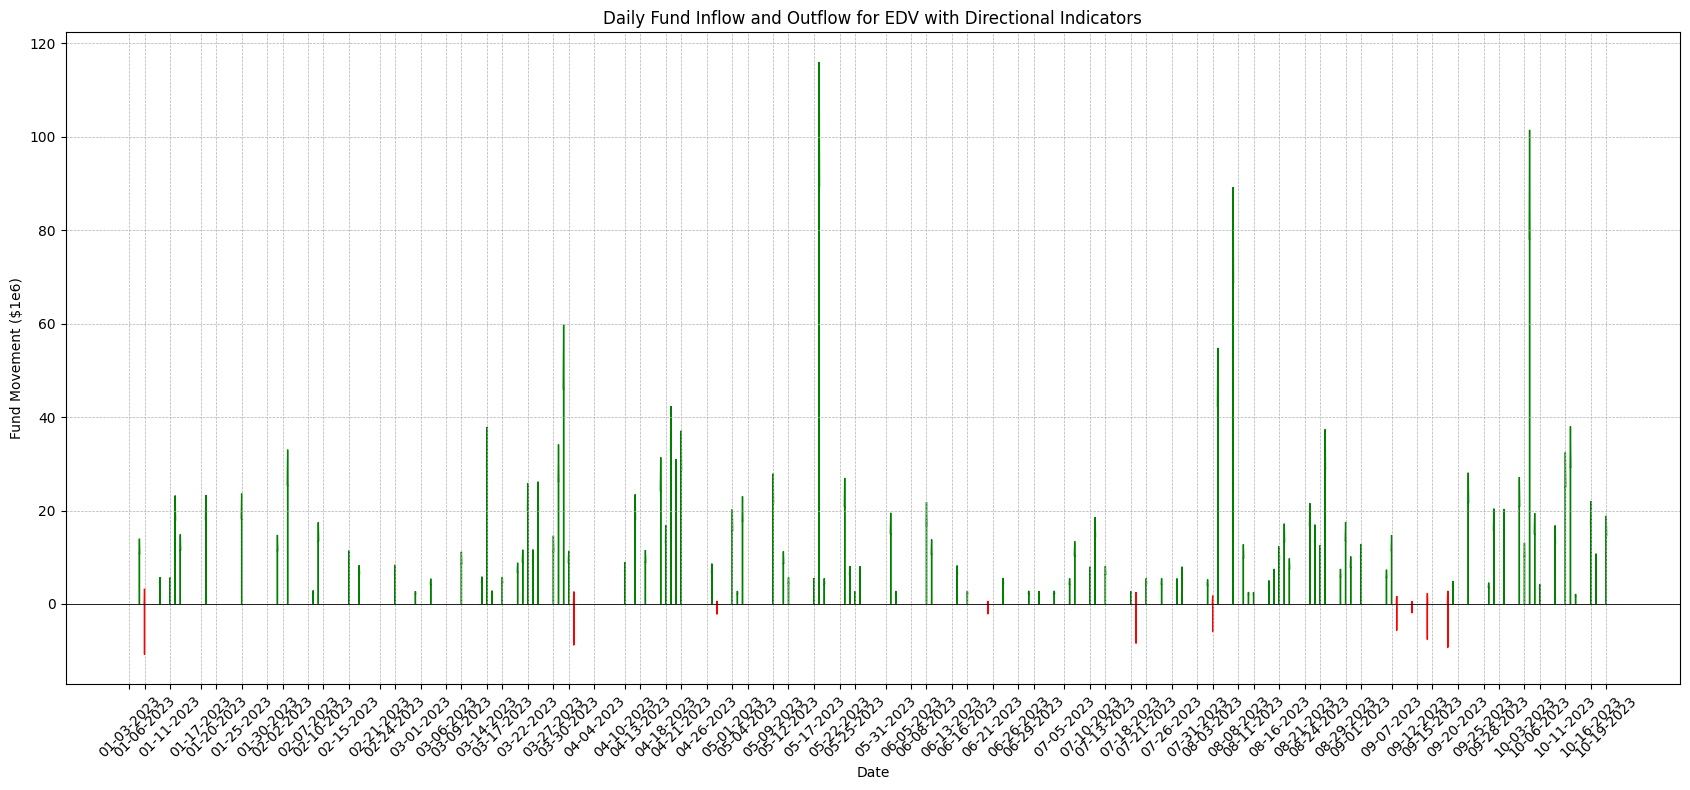

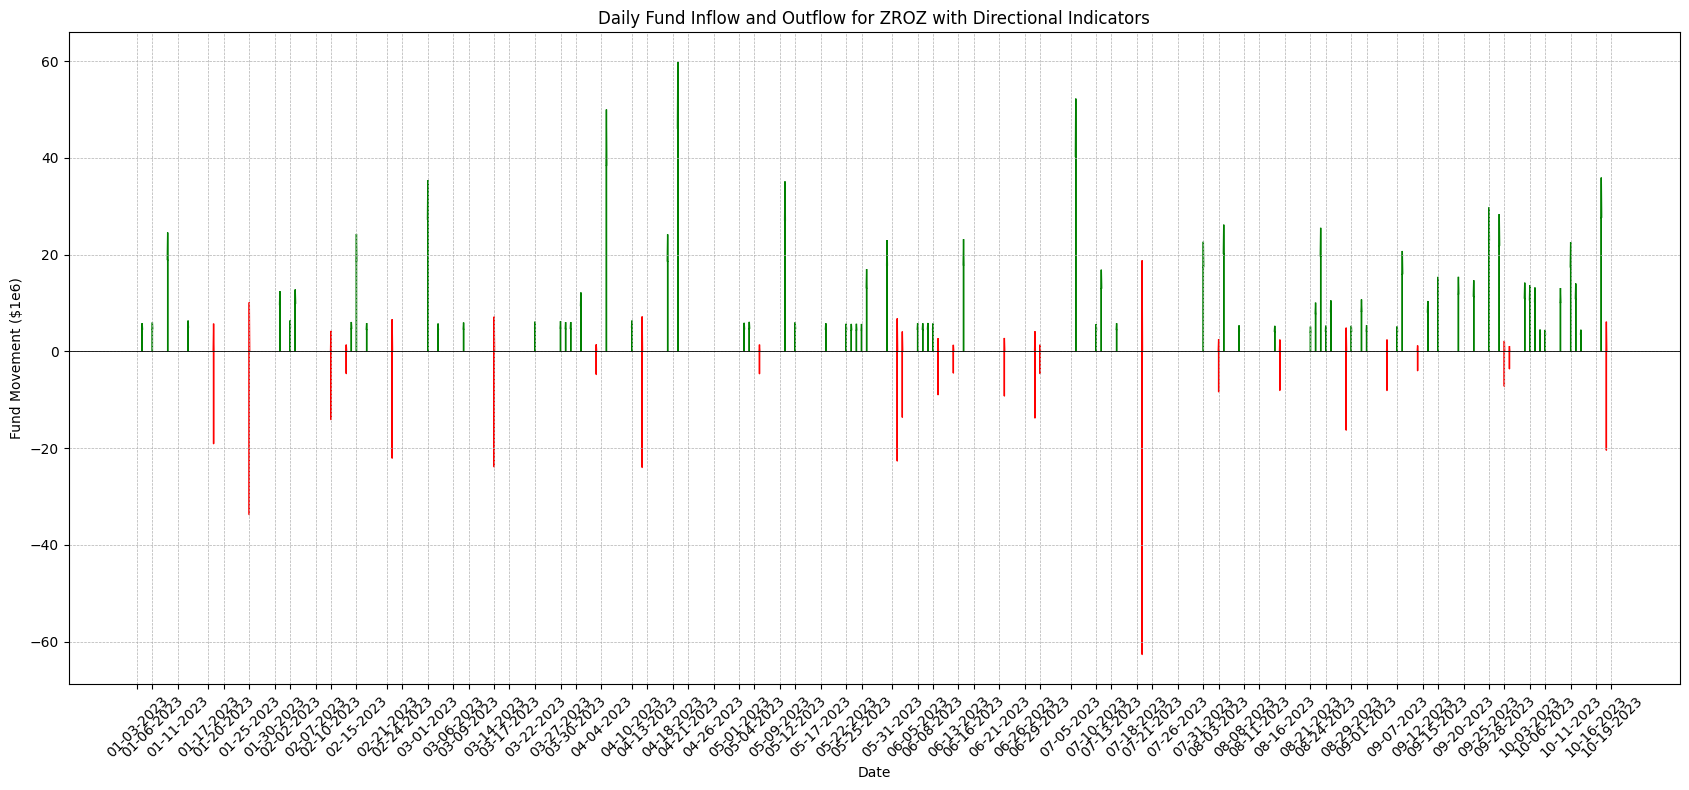

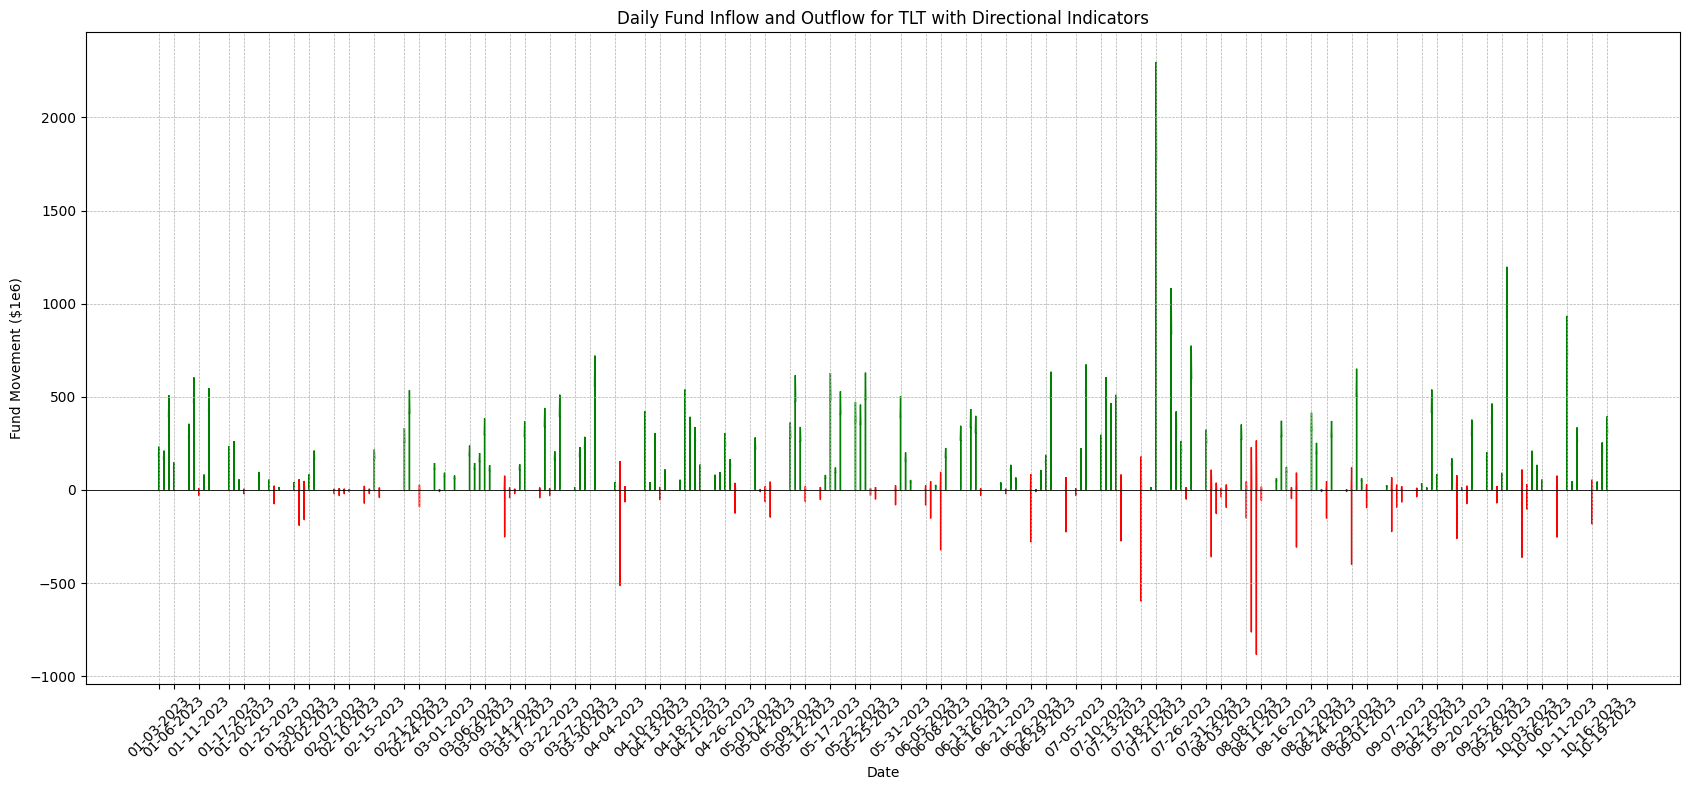

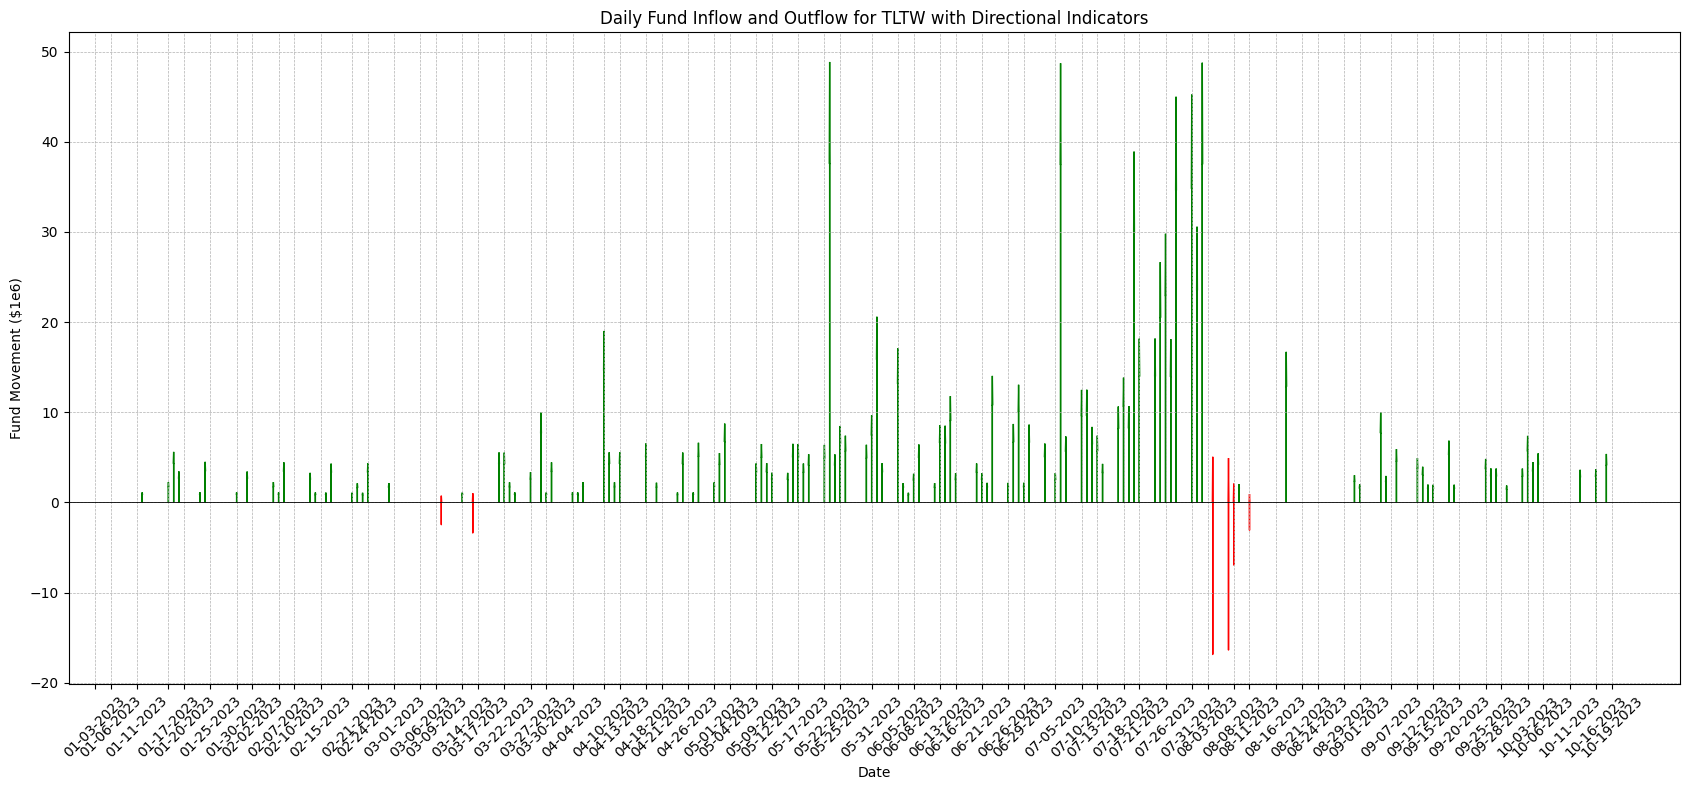

In [6]:
plot_fund_flow_ticks('EDV', 3)
plot_fund_flow_ticks('ZROZ', 3)
plot_fund_flow_ticks('TLT', 3)
plot_fund_flow_ticks('TLTW', 3)

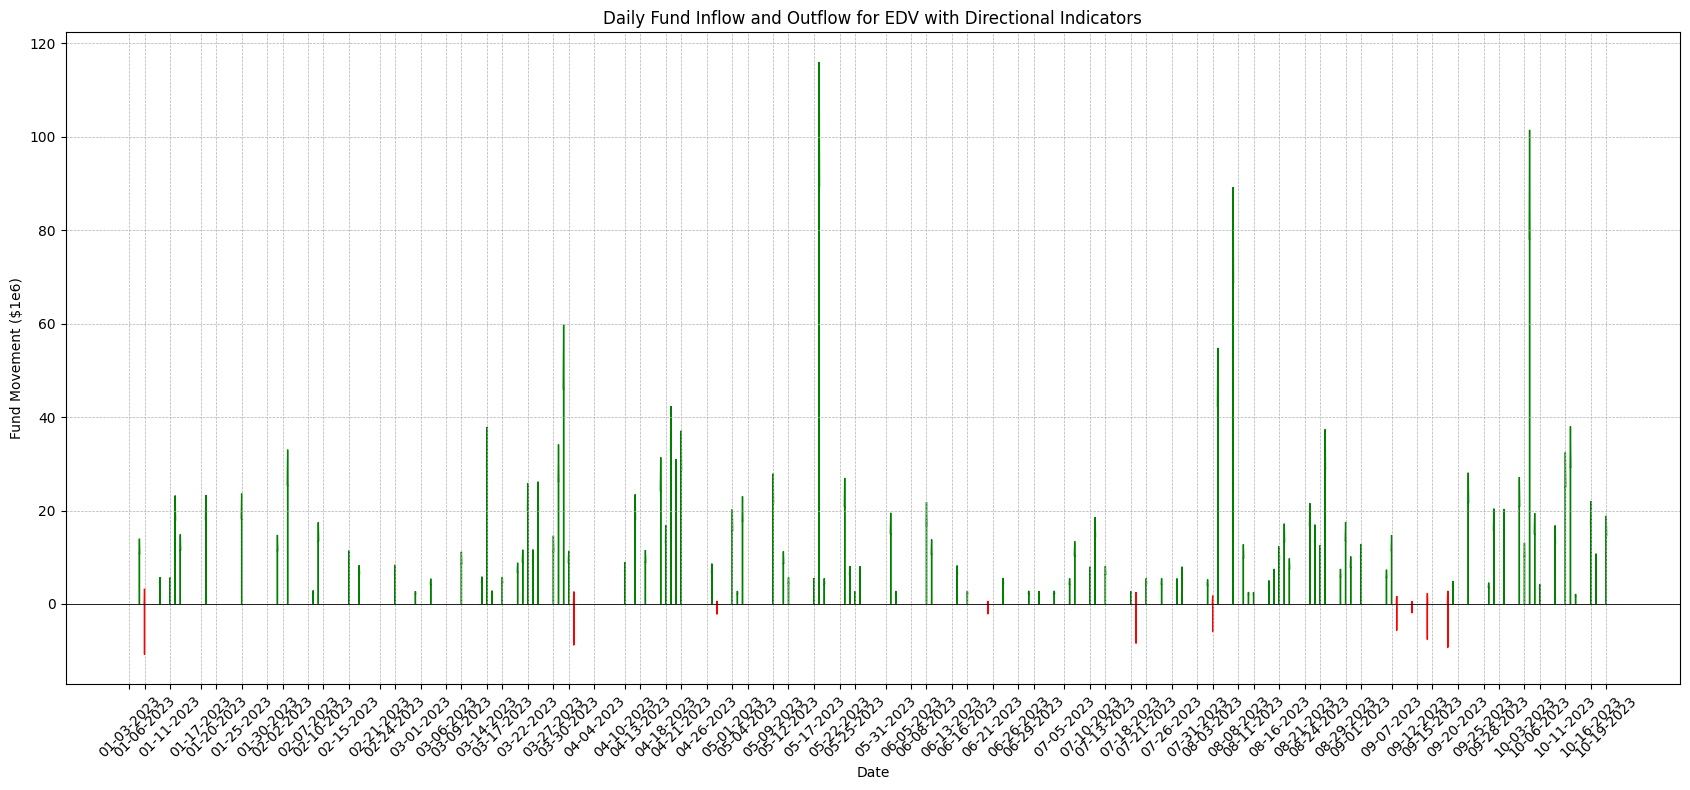

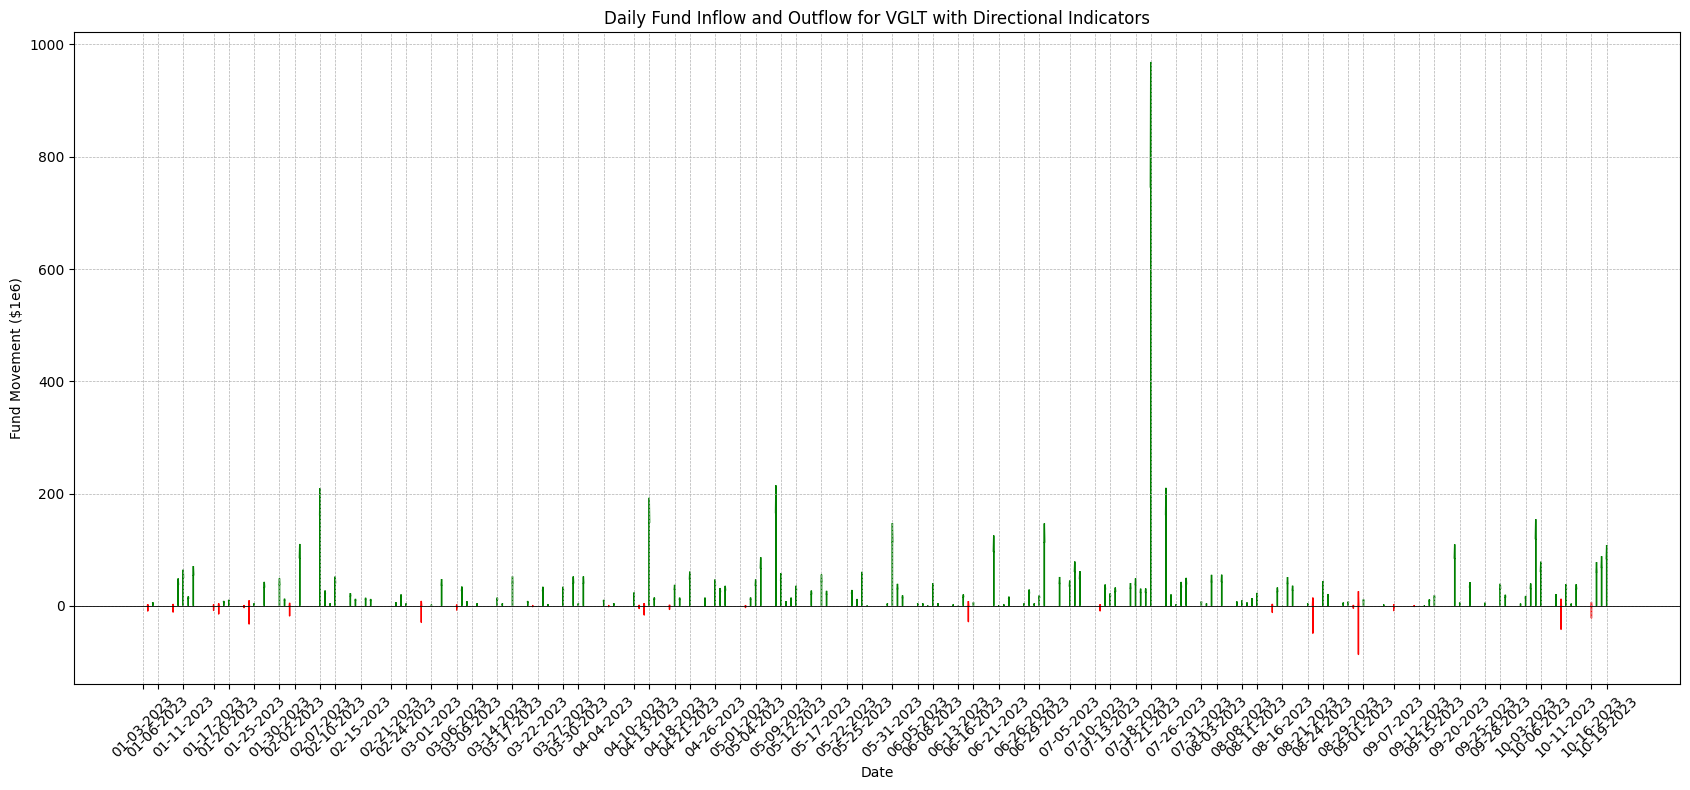

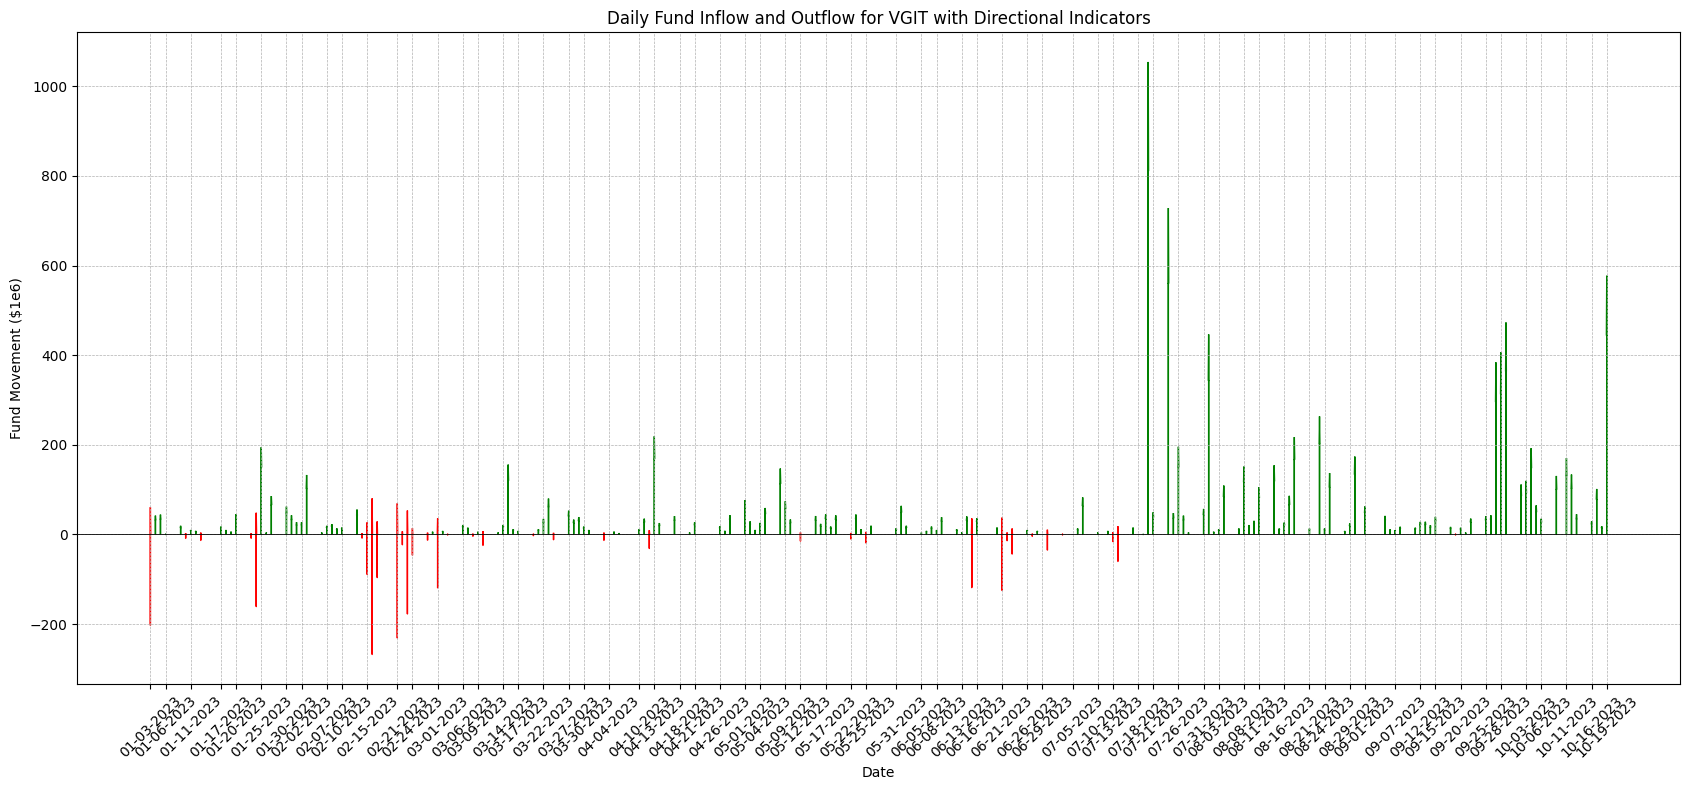

In [9]:
# Vanguard Treasury ETFs Fund Flow (as of 10/23/2023)

plot_fund_flow_ticks('EDV', 3)
plot_fund_flow_ticks('VGLT', 3)
plot_fund_flow_ticks('VGIT', 3)

In [24]:
fund_flow_data_path = r'C:\Users\chris\ETF_Fund_Flows\data\flow\EDV_fund_flow_data.xlsx'
fund_data_path = r'C:\Users\chris\ETF_Fund_Flows\data\yahoofin\EDV_yahoofin_historical_data.xlsx'
nav_price_path = r'C:\Users\chris\ETF_Fund_Flows\data\other\EDV_10-23-2023_all_nav_prices.xlsx'
# treasury_yield_data_path = r'C:\Users\chris\ETF_Fund_Flows\data\treasury\2023_daily_treasury_rates.xlsx'

fund_flow_df = pd.read_excel(fund_flow_data_path, index_col=0)
fund_flow_df.index.names = ['Date']
fund_flow_df.rename(columns={'value':'flow'}, inplace=True)
fund_flow_df['flow'] = fund_flow_df['flow'].apply(lambda x: x * 1e6)
fund_flow_df.replace(np.nan, 0, inplace=True)

nav_df = pd.read_excel(nav_price_path).sort_values('date')
nav_df['date'] = pd.to_datetime(nav_df['date'], format='%m/%d/%Y')
nav_df = nav_df[nav_df['date'].dt.year == 2023]
nav_df['date'] = nav_df['date'].dt.strftime('%Y-%m-%d')
nav_df.set_index('date', inplace=True)

fund_data_df = pd.read_excel(fund_data_path, index_col=0)
# yields_df = pd.read_excel(treasury_yield_data_path, index_col=0).sort_values('Date')

# df = pd.concat([fund_data_df, nav_df, fund_flow_df, yields_df], axis=1)
df = pd.concat([fund_data_df, nav_df, fund_flow_df], axis=1)

df['navPrice'] = df['navPrice'].str.replace('$', '')
df['navPrice'] = df['navPrice'].str.replace(',', '')
df['navPrice'] = df['navPrice'].astype('float')

df["Premium/Discount"] = ((df["Close"] - df["navPrice"]) / df["navPrice"]) 
df["Premium/Discount Adjusted"] = ((df["Adj Close"] - df["navPrice"]) / df["navPrice"]) 

df["Estimated Daily Creation Units"] = df["flow"] / df["navPrice"]

shares_outstanding_starting = {"date": "2023-09-29", "shares": 31050000}
df["Estimated Shares Outstanding"] = np.nan
df.at[shares_outstanding_starting["date"], "Estimated Shares Outstanding"] = shares_outstanding_starting["shares"] 

df.head()
df.to_excel(r'C:\Users\chris\ETF_Fund_Flows\data\other\temp.xlsx')

C:\Users\chris\AppData\Local\Temp\ipykernel_24012\279422572.py:24: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['navPrice'] = df['navPrice'].str.replace('$', '')


In [11]:
data = [
    {"day": 1, "nav_price": 100, "open": 100, "close": 101, "daily_creatation_units": 10, "shares_outstanding": None },
    {"day": 2, "nav_price": 101, "open": 101, "close": 102, "daily_creatation_units": 1, "shares_outstanding": 100 },
    {"day": 3, "nav_price": 102, "open": 102, "close": 100, "daily_creatation_units": -1, "shares_outstanding": None },
]

# Starting shares outstanding
starting_shares_outstanding = 1000000  # 1,000,000 shares

# Results placeholder
results = []

# Iterate over each day
for i, current_day in enumerate(data):
    # Previous day data (if current day is not the first day)
    prev_day = data[i - 1] if i > 0 else None

    # Calculate daily return based on price movement
    daily_return = (current_day["close"] - current_day["open"]) / current_day["open"]

    # Calculate total value at the start of the day
    total_value_start = (
        starting_shares_outstanding * prev_day["nav_price"]
        if prev_day
        else starting_shares_outstanding * current_day["nav_price"]
    )

    # Calculate total value at the end of the day
    total_value_end = starting_shares_outstanding * current_day["nav_price"]

    # Estimate fund flow
    fund_flow = (total_value_end - total_value_start) - (
        total_value_start * daily_return
    )

    # Estimate shares outstanding at the end of the day
    shares_outstanding_end = starting_shares_outstanding + (
        fund_flow / current_day["nav_price"]
    )

    # Prepare results for the current day
    results.append(
        {
            "day": current_day["day"],
            "daily_return": daily_return,
            "total_value_start": total_value_start,
            "total_value_end": total_value_end,
            "fund_flow": fund_flow,
            "shares_outstanding_end": shares_outstanding_end,
        }
    )

    # Update the starting shares for the next iteration/day
    starting_shares_outstanding = shares_outstanding_end
    
    2_861_676_123
    
results

[{'day': 1,
  'daily_return': 0.01,
  'total_value_start': 100000000,
  'total_value_end': 100000000,
  'fund_flow': -1000000.0,
  'shares_outstanding_end': 990000.0},
 {'day': 2,
  'daily_return': 0.009900990099009901,
  'total_value_start': 99000000.0,
  'total_value_end': 99990000.0,
  'fund_flow': 9801.980198019766,
  'shares_outstanding_end': 990097.0493088913},
 {'day': 3,
  'daily_return': -0.0196078431372549,
  'total_value_start': 99999801.98019803,
  'total_value_end': 100989899.0295069,
  'fund_flow': 2950877.480293156,
  'shares_outstanding_end': 1019027.2206843144}]

In [21]:
import pandas as pd

def data_to_dataframe(data):
    # Convert the list of dictionaries to a DataFrame
    df = pd.DataFrame(data)
    
    # Assume an initial amount of shares before the operations start.
    # This can be zero or any other predefined value. 
    initial_shares_outstanding = 0  # Can be set to a different value if needed

    # Calculate the 'shares_outstanding' based on the 'daily_creation_units'
    for i, row in df.iterrows():
        if i == 0:
            # For the first day, initialize with the known quantity
            current_shares = initial_shares_outstanding + row['daily_creatation_units']
        else:
            # For subsequent days, add the daily creation units to the previous day's total
            current_shares = df.at[i - 1, 'shares_outstanding'] + row['daily_creatation_units']

        df.at[i, 'shares_outstanding'] = current_shares

    return df

# Test the function with your data
data = [
    {"day": 1, "nav_price": 100, "open": 100, "close": 101, "daily_creatation_units": 10, "shares_outstanding": 99 },
    {"day": 2, "nav_price": 101, "open": 101, "close": 102, "daily_creatation_units": 1, "shares_outstanding": 100 },
    {"day": 3, "nav_price": 102, "open": 102, "close": 100, "daily_creatation_units": -1, "shares_outstanding": 99 },
]

df = data_to_dataframe(data)
print(df)


   day  nav_price  open  close  daily_creatation_units  shares_outstanding
0    1        100   100    101                      10                10.0
1    2        101   101    102                       1                11.0
2    3        102   102    100                      -1                10.0


In [ ]:
def calc_estimated_shares_outstanding(
    current_shares_outstanding: int, next_day_nav: int, next_day_flow: int
) -> int:
    return (next_day_flow / next_day_nav) + current_shares_outstanding